In [1]:
#29/7/24 Creates 5 fold predictive models using Hepatox MorganFP data and Random Forest

import os
import pandas as pd
import numpy as np
import math
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sys
sys.path.insert(1, '/Users/james/Documents/Honours/Python')
from Function_Repo import metriccalc

seed = 81
#Data import
datasets = []
index = []
targetdata = pd.read_csv('/Users/james/Documents/Honours/Data/Hepatoxicity/Structure/hepatoxAvafp.csv')
targetdata = targetdata.iloc[:,1:]
#Splitting data into 5 folds 
dfarray = targetdata.to_numpy()
#First set aside 20% of the data for a final validation at the end
dfarray, tempset = train_test_split(dfarray, test_size=0.2, random_state=seed, stratify = targetdata['Toxicity_Value'])

size = len(dfarray) / 5
splitsize = math.ceil(size)
empty = [[] for _ in range(5)]
splits = []
for list in empty:
    splits.append(list)

loops = 0
currsplit = 0
#Results in a list of 5 lists that each contain 1/5 of the targetdata
for row in dfarray:
    splits[currsplit].append(row)
    if loops == splitsize:
        loops = 0
        currsplit = currsplit + 1
    loops = loops + 1

folds = []
for split in splits:
    temp = pd.DataFrame(split)
    folds.append(temp)

In [2]:
targetdata

,Toxicity_Value,0,1,2,3,4,5,6,7,8,...,502,503,504,505,506,507,508,509,510,511
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2884,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,1,0
2885,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,1,1,0
2886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2887,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [3]:
zercount = 0
onecount = 0
for item in targetdata['Toxicity_Value']:
    if item == 0:
        zercount = zercount + 1
    else:
        onecount = onecount + 1

print(zercount, onecount)

1424 1465


In [4]:
targetdata

,Toxicity_Value,0,1,2,3,4,5,6,7,8,...,502,503,504,505,506,507,508,509,510,511
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2884,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,1,0
2885,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,1,1,0
2886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2887,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


for fold 1 best mcc of 0.4000527676919298 with an mtry of 7 on test set


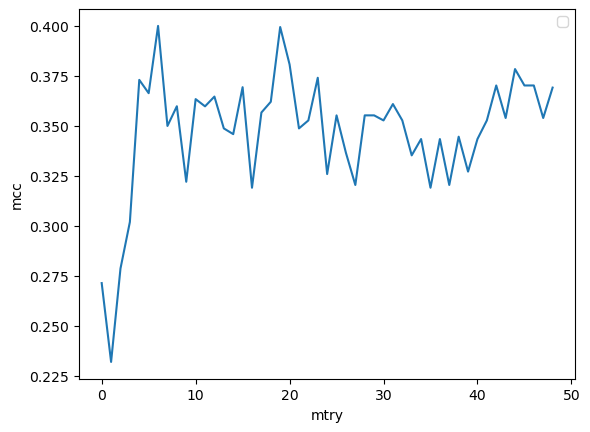

for model 1 validation metrics of:
positives in data 110
negatives in data 122 

fn count = 34
tn count = 77
tp count = 76
fp count = 45 

net accuracy = 0.6594827586206896
positive accuracy = 0.6909090909090909
negative accuracy = 0.6311475409836066 

fpr = 0.36885245901639346
tpr = 0.6909090909090909 

f1 score = 0.658008658008658
mcc = 0.32192472255605914
cohen Kappa = 0.3204804982945277


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


for fold 2 best mcc of 0.46546053002220283 with an mtry of 42 on test set


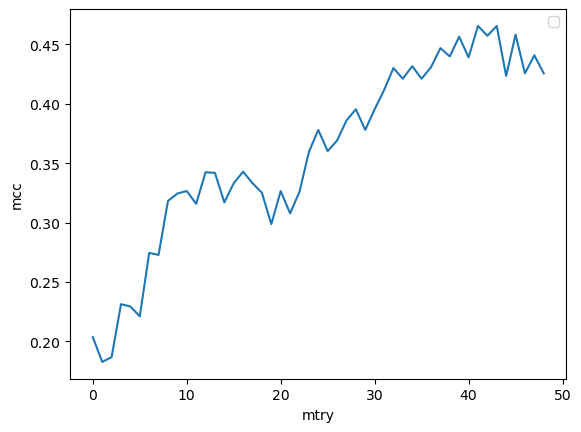

for model 2 validation metrics of:
positives in data 119
negatives in data 113 

fn count = 30
tn count = 75
tp count = 89
fp count = 38 

net accuracy = 0.7068965517241379
positive accuracy = 0.7478991596638656
negative accuracy = 0.6637168141592921 

fpr = 0.336283185840708
tpr = 0.7478991596638656 

f1 score = 0.7235772357723578
mcc = 0.41334093045903303
cohen Kappa = 0.4123519332489011


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


for fold 3 best mcc of 0.40705369228455407 with an mtry of 29 on test set


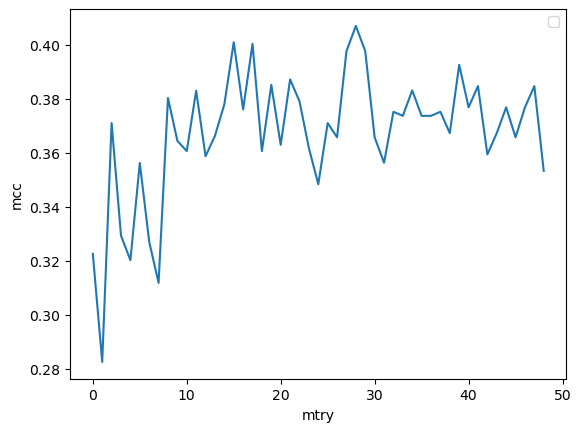

for model 3 validation metrics of:
positives in data 113
negatives in data 119 

fn count = 26
tn count = 79
tp count = 87
fp count = 40 

net accuracy = 0.7155172413793104
positive accuracy = 0.7699115044247787
negative accuracy = 0.6638655462184874 

fpr = 0.33613445378151263
tpr = 0.7699115044247787 

f1 score = 0.725
mcc = 0.43559487757317794
cohen Kappa = 0.43242642152865296


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


for fold 4 best mcc of 0.395672498824296 with an mtry of 25 on test set


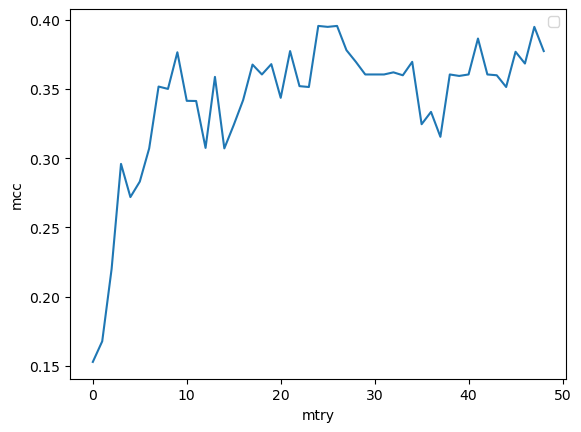

for model 4 validation metrics of:
positives in data 120
negatives in data 112 

fn count = 35
tn count = 79
tp count = 85
fp count = 33 

net accuracy = 0.7068965517241379
positive accuracy = 0.7083333333333334
negative accuracy = 0.7053571428571429 

fpr = 0.29464285714285715
tpr = 0.7083333333333334 

f1 score = 0.7142857142857143
mcc = 0.41350591652204904
cohen Kappa = 0.4134443783462225


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


for fold 5 best mcc of 0.4247831163867526 with an mtry of 35 on test set


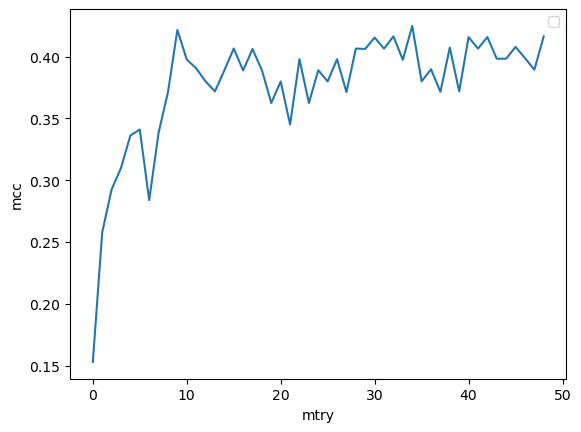

for model 5 validation metrics of:
positives in data 126
negatives in data 103 

fn count = 34
tn count = 62
tp count = 92
fp count = 41 

net accuracy = 0.6724890829694323
positive accuracy = 0.7301587301587301
negative accuracy = 0.6019417475728155 

fpr = 0.39805825242718446
tpr = 0.7301587301587301 

f1 score = 0.7104247104247104
mcc = 0.33482042878983115
cohen Kappa = 0.33417328939717


In [5]:
import math
model_list = []
validlist = []
totalmetrics = []
testdat = []
#For loop that uses each fold once for valid/testing and the rest for training
#Each 'split' in the range corresponds to the set used for test/validation with the other 4 for training
iteration = 1
for split in range(0,5):
    #Set creation
    trainlist = [df for i, df in enumerate(folds) if i != split]
    trainset = pd.concat(trainlist, axis=0)
    testset, validset = train_test_split(folds[split], test_size=0.5, random_state=seed)
    
    ytrain = trainset[0].values
    xtrain = trainset.iloc[:, 1:]
    
    ytest = testset[0].values
    xtest = testset.iloc[:, 1:]
    
    yvalid = validset[0].values
    xvalid = validset.iloc[:, 1:]
    
    #lists of metric values
    mcclist = []
    bestmetrics = 0
    maxval = 0
    for mtry in range(1, 50):
        #using mtry as the adjusted hyperparameter creates a series of random forests
        rf = RandomForestClassifier(n_estimators=mtry, criterion='entropy', max_depth=None, 
                                min_samples_split=2, min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, max_features='sqrt', 
                                max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                bootstrap=True, oob_score=False, n_jobs= 4, random_state=seed, 
                                verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

        model= rf.fit(xtrain, ytrain)
        preds = model.predict(xtest)
        #calculate metric (mcc)
        mcc = metriccalc(preds, ytest)[12]
        mcclist.append(mcc)
        if mcc > maxval:
            maxval = mcc
            bestmetrics = mtry
    #store best model for the given fold and plot the metric vs mcc value
    rf = RandomForestClassifier(n_estimators=bestmetrics, criterion='entropy', max_depth=None, 
                                min_samples_split=2, min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, max_features='sqrt', 
                                max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                bootstrap=True, oob_score=False, n_jobs= 4, random_state=seed, 
                                verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
    model_list.append(rf)
    testdat.append(maxval)
    totalmetrics.append(mcclist)
    print('for fold', split + 1, 'best mcc of', maxval, 'with an mtry of', bestmetrics, 'on test set')
    plt.plot(mcclist)

    plt.xlabel('mtry')
    plt.ylabel('mcc')
    plt.legend()
    plt.show()
    
    #check models onto validation set, printing various metrics
    model= rf.fit(xtrain, ytrain)
    preds = model.predict(xvalid)
    results = metriccalc(preds, yvalid)
    validlist.append(results)
    print('for model', iteration, 'validation metrics of:')
    print('positives in data', results[0])
    print('negatives in data', results[1], '\n')
    print('fn count =', results[2])
    print('tn count =', results[3])
    print('tp count =', results[4])
    print('fp count =', results[5], '\n')
    print('net accuracy =', results[6])
    print('positive accuracy =', results[7])
    print('negative accuracy =', results[8], '\n')
    print('fpr =', results[9])
    print('tpr =', results[10], '\n')
    print('f1 score =',results[11])
    print('mcc =',results[12])
    print('cohen Kappa =',results[13])
    iteration = iteration + 1

In [6]:
y = tempset[:, 0]
x = tempset[:, 1:]
iter = 1
validdat = []
for model in model_list:
    predictions = []
    preds = model.predict(x)
    predictions.append(preds)
    
    results = metriccalc(preds, y)
    print('model', iter, 'validation metrics of:')
    print('positives in data', results[0])
    print('negatives in data', results[1], '\n')
    print('fn count =', results[2])
    print('tn count =', results[3])
    print('tp count =', results[4])
    print('fp count =', results[5], '\n')
    print('net accuracy =', results[6])
    print('fpr =', results[9])
    print('tpr =', results[10], '\n')
    print('f1 score =',results[11])
    print('mcc =',results[12])
    print('cohen Kappa =',results[13], '\n')
    iter = iter + 1
    validdat.append(results[12])

model 1 validation metrics of:
positives in data 293
negatives in data 285 

fn count = 86
tn count = 193
tp count = 207
fp count = 92 

net accuracy = 0.6920415224913494
fpr = 0.32280701754385965
tpr = 0.7064846416382252 

f1 score = 0.6993243243243243
mcc = 0.383870745798452
cohen Kappa = 0.38378792779195264 

model 2 validation metrics of:
positives in data 293
negatives in data 285 

fn count = 72
tn count = 200
tp count = 221
fp count = 85 

net accuracy = 0.7283737024221453
fpr = 0.2982456140350877
tpr = 0.7542662116040956 

f1 score = 0.7378964941569283
mcc = 0.4567678564706309
cohen Kappa = 0.4563047463841923 

model 3 validation metrics of:
positives in data 293
negatives in data 285 

fn count = 63
tn count = 200
tp count = 230
fp count = 85 

net accuracy = 0.7439446366782007
fpr = 0.2982456140350877
tpr = 0.7849829351535836 

f1 score = 0.756578947368421
mcc = 0.4886723162918234
cohen Kappa = 0.4872508001966026 

model 4 validation metrics of:
positives in data 293
negative

In [7]:
#get x and y values for the final validation set

toxvals = []
fingerprints = []
for row in tempset:
    toxvals.append(row[0])
    fingerprints.append(row[1:])

In [8]:
#calculates consensus of models on each fingerprint in the final validation set
consensuslist = []
predictions = []
for fp in fingerprints:
    consensus = -1
    fp = fp.reshape(1, -1)
    #appends each model's prediction to a list
    predictions = []
    predlist = []
    for model in model_list:
        preds = model.predict(fp)
        predictions.append(preds)
        predlist.append(preds)
    predictions.append(predlist)
    
    #finds number of 0s in the prediction list
    zercount = 0
    for num in predictions:
        if num == 0:
            zercount = zercount + 1
    #as there are 5 models, if there are less than 3 0s predicted, the consensus is 1
    if zercount < 3 :
        consensus = 1
    else:
        consensus = 0
    consensuslist.append(consensus)
#calculate and print metrics
results = metriccalc(consensuslist, toxvals)
print('validation metrics of:')
print('positives in data', results[0])
print('negatives in data', results[1], '\n')
print('fn count =', results[2])
print('tn count =', results[3])
print('tp count =', results[4])
print('fp count =', results[5], '\n')
print('net accuracy =', results[6])
print('positive accuracy =', results[7])
print('negative accuracy =', results[8], '\n')
print('fpr =', results[9])
print('tpr =', results[10], '\n')
print('f1 score =',results[11])
print('mcc =',results[12])
print('cohen Kappa =',results[13])

validation metrics of:
positives in data 293
negatives in data 285 

fn count = 68
tn count = 199
tp count = 225
fp count = 86 

net accuracy = 0.7335640138408305
positive accuracy = 0.7679180887372014
negative accuracy = 0.6982456140350877 

fpr = 0.3017543859649123
tpr = 0.7679180887372014 

f1 score = 0.7450331125827815
mcc = 0.46747551605967624
cohen Kappa = 0.46656598707945296
